In [2]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
Scplx= PowerSeriesRing(CC,'x',default_prec=300)
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))
def xjNew(n,m):
    return xjNewStep(n-1,m)
def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))
def j(n,m):return xjNew(n,m)/x

def H4(n,m): # this is the definition in the published interpolations paper (2021):
    # def. 8.4
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    return ((S(numerator/denominator)^(1/(m-2))).O(n+1)).polynomial()
    #if argument is an S type then 'polynomial' takes no argument.

def H4strike(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=H4(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [0..polydegree])
    return answer


def H6(n,m):
    def base6(n,m):
        jay=J(n+1,m)
        num=(x*derivative(jay,x))^m # chain rule; variable is tau not x.
        den = expand(jay^(m-1)*(jay-1))
        return L((-1)^m*(num/den)).O(n+1)
    return S(base6(n,m)^(1/(m-2))).polynomial()
     #if argument is an S type then 'polynomial' takes no argument.

def H6strike(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=H6(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [0..polydegree])
    return answer

def polynomialCoefficient(n,poly):
    return poly.list()[n]
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)

def deltaDagger(n,m):
    def ddstep1(n,m):
        return D(S(expand((H4(n+2,m)^3)))).truncate(n+1)
    def ddstep2(n,m):
        return D(S((H6(n+2,m)^2))).truncate(n+1)
    return ((ddstep1(n,m)-ddstep2(n,m))/1728)

def deltaDagger2(n,m):
    def ddstep1(n,m):
        return D(S(expand((H4(n+2,m)^3)))).truncate(n+1)
    def ddstep2(n,m):
        return D(S((H6(n+2,m)^2))).truncate(n+1)
    return (ddstep1(n,m)-ddstep2(n,m))

def deltaDaggerStrike(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=deltaDagger(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [1..polydegree])
    return answer

# def deltaDaggerStrike(n,m):
 #   return S(((H4strike(n,3)^3-H6strike(n,3)^2)/1728)).truncate(n+1)
    
def deltaDaggerStrike2(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=deltaDagger2(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [1..polydegree])
    return answer



def first(list):return list[0]
def last(list):return list[-1]

def rmnjntau(n):
    answer=0
    for k in [1..n-1]:
        answer=answer+(6*k-4*(n-k))*sigma(k,3)*sigma(n-k,5)
    answer=(5*sigma(n,3)+7*sigma(n,5))*n/12-35*answer
    return answer

def element(k,listo):
    if k>len(listo):return (print("bad k"))
    return listo[k-1]

def mobiusInverseOfFunction(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        f=f+moebius(dvk)*g(n/dvk)
    return f

def mobiusInverseOfList(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        gndvk=element(n/dvk,g)
        f=f+moebius(dvk)*gndvk
    return f

def drop_first_element(listo):
    lenth=len(listo)
    answer=[]
    for k in [1..lenth-1]:
        answer=answer+[listo[k]]
    return answer

def factorSeriesFromLists(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
    return nswr

def factorSeriesFromListsWithTracking(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
            print((n,k))
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
        print("answer length: ",len(nswr))
    return nswr

print("ok1")

ok1


In [2]:
#kernel 9.2
print(deltaDagger(5,3))

print(deltaDaggerStrike2(5,3))

805/2567836929097728*x^5 - 23/139314069504*x^4 + 7/143327232*x^3 - 1/124416*x^2 + 1/1728*x
8346240*x^5 - 2543616*x^4 + 435456*x^3 - 41472*x^2 + 1728*x


In [2]:
#kernel 9.6
print(deltaDagger(5,3))

print(deltaDaggerStrike2(5,3))

805/2567836929097728*x^5 - 23/139314069504*x^4 + 7/143327232*x^3 - 1/124416*x^2 + 1/1728*x
8346240*x^5 - 2543616*x^4 + 435456*x^3 - 41472*x^2 + 1728*x


In [ ]:
#from 'H4 from scratch per 2021 Integers paper'
data=[]
import time
for m in [3..403]:
    start=time.time()
    poly=H4(100,m)
    data=data+[[m,poly]]
    finish=time.time()
    print([m,poly.degree(),finish-start])
import pickle
wfile = open('/Users/barrybrent/21mar12no15.txt','w') # H4 series (date typo)
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [ ]:
#from 'H4 from scratch per 2021 Integers paper'
import pickle
rfile = open('/Users/barrybrent/21mar12no15.txt','r') # H4 series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import pickle
import time
wfile = open('/Users/barrybrent/21mar21no19.txt','w') #H4 polynomials
for n in [0..100]:
    start=time.time()
    data=[]
    for k in [0..400]:
        m = s[k][0]
        poly=s[k][1]
        cf=polynomialCoefficient(n,poly)
        data=data+[[m,cf]]
        rl=R.lagrange_polynomial(data)
    polydata=polydata+[[n,rl]]
    finish=time.time()
    print([n,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

In [2]:
n=5
dds=deltaDagger(n,3)
cffs=dds.list()
data=[]
for k in [1..n]:
    data=data+[cffs[k]-rmnjntau(k)]
print(data)

[-1727/1728, 2985983/124416, -36118462457/143327232, 205070310309865/139314069504, -12402652367542025435/2567836929097728]


In [ ]:
import pickle
rfile = open('/Users/barrybrent/21mar12no12.txt','r') # H4 series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/21mar21no13.txt','w') # H4 polynomials
for qpower in [0..100]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=s[k][1] 
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    finish = time.time()
    print([qpower,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

In [ ]:
# from H4 from scratchno2
data=[]
import time
for m in [3..403]:
    start=time.time()
    poly=H4(100,m)
    data=data+[[m,poly]]
    finish=time.time()
    print([m,poly.degree(),finish-start])
import pickle
wfile = open('/Users/barrybrent/21mar12no15.txt','w') # H4 series (date typo)
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [ ]:
data=[]
for m in [3..400]:
    if 10 in divisors(m):
        print m
    data=data+[[m,H6(100,m)]] # this is okay; all m are included.
import pickle
wfile = open('/Users/barrybrent/8mar21no13.txt','a') #H6 series from 'H6 from scratch'
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [2]:
import pickle

rfile = open('/Users/barrybrent/21mar12no15.txt','rb') # H4 series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)

rfile2 = open('/Users/barrybrent/8mar21no13.txt','rb') #H6 series from
#'H6 from scratch'
rt=pickle.load(rfile2)
rfile2.close()
t=stripQuotationMarks(rt)


import time
wfile = open('/Users/barrybrent/10sept22no2.txt','wb') # deltaDagger series
data=[]
minn=min(len(s),len(t))
print("minn: ",minn-1)
start = time.time()
for n in [0..minn-1]:
    start = time.time()
    m=s[n][0]
    h6squared=t[n][1]^2
    h4cubed=s[n][1]^3
    dagger=D(((h4cubed-h6squared)/1728)).truncate(100)
    data=data+[[m,dagger]]
    finish = time.time()
    print([m,dagger.degree(),finish-start])
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

minn:  117
[3, 99, 0.46518468856811523]
[4, 99, 0.01514291763305664]
[5, 99, 0.021960020065307617]
[6, 99, 0.009706974029541016]
[7, 99, 0.021113157272338867]
[8, 99, 0.021106958389282227]
[9, 99, 0.021327972412109375]
[10, 99, 0.021417856216430664]
[11, 99, 0.0235598087310791]
[12, 99, 0.02135610580444336]
[13, 99, 0.02232503890991211]
[14, 99, 0.0223391056060791]
[15, 99, 0.02218008041381836]
[16, 99, 0.024342060089111328]
[17, 99, 0.023572921752929688]
[18, 99, 0.02194499969482422]
[19, 99, 0.022443771362304688]
[20, 99, 0.022587060928344727]
[21, 99, 0.02276015281677246]
[22, 99, 0.023442983627319336]
[23, 99, 0.02401900291442871]
[24, 99, 0.023086071014404297]
[25, 99, 0.023469209671020508]
[26, 99, 0.024840831756591797]
[27, 99, 0.02502298355102539]
[28, 99, 0.02333688735961914]
[29, 99, 0.02351999282836914]
[30, 99, 0.023747920989990234]
[31, 99, 0.024119138717651367]
[32, 99, 0.024679899215698242]
[33, 99, 0.02526092529296875]
[34, 99, 0.02428913116455078]
[35, 99, 0.0241937637

In [3]:
import pickle
rfile = open('/Users/barrybrent/10sept22no2.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

118


In [4]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/10sept22no2.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=99
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
import time
start=time.time()
for index in [0..117]:
    
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]
    print([m(index),time.time()-start])

wfile = open('/Users/barrybrent/10sept22no3.txt','wb') #dagger Euler exponents
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

[3, 0.032772064208984375]
[4, 0.060971975326538086]
[5, 0.09679818153381348]
[6, 0.11838102340698242]
[7, 0.15537810325622559]
[8, 0.19162511825561523]
[9, 0.21987700462341309]
[10, 0.254697322845459]
[11, 0.29399800300598145]
[12, 0.32486605644226074]
[13, 0.36738133430480957]
[14, 0.4050772190093994]
[15, 0.4348001480102539]
[16, 0.47444701194763184]
[17, 0.5186691284179688]
[18, 0.5469229221343994]
[19, 0.5907220840454102]
[20, 0.6300783157348633]
[21, 0.6601500511169434]
[22, 0.7021570205688477]
[23, 0.7434940338134766]
[24, 0.777569055557251]
[25, 0.8222661018371582]
[26, 0.865333080291748]
[27, 0.8953230381011963]
[28, 0.9358310699462891]
[29, 0.9781451225280762]
[30, 1.0059690475463867]
[31, 1.0458569526672363]
[32, 1.0917720794677734]
[33, 1.1252131462097168]
[34, 1.166944980621338]
[35, 1.2082569599151611]
[36, 1.239135980606079]
[37, 1.285872220993042]
[38, 1.3300909996032715]
[39, 1.3599920272827148]
[40, 1.4004809856414795]
[41, 1.4468052387237549]
[42, 1.4791579246520996]


In [5]:
import pickle
rfile = open('/Users/barrybrent/10sept22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))
print(s[0])

118
[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]


In [3]:
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/10sept22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/10sept22no5.txt','wb') #dagger Euler exponents polynomials
start = time.time()
for qpower in [0..20]:  #any more and the degrees become constant
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=D(s[k][1])
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    rl=D(rl)
    finish = time.time()
    print([qpower,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close() #I deleted this

[0, 6, 0.05757498741149902]
[1, 12, 0.11909890174865723]
[2, 18, 0.17872905731201172]
[3, 24, 0.24010801315307617]
[4, 30, 0.3020179271697998]
[5, 36, 0.3648209571838379]
[6, 42, 0.42575907707214355]
[7, 48, 0.48633289337158203]
[8, 54, 0.5476400852203369]
[9, 60, 0.6116368770599365]
[10, 66, 0.711035966873169]
[11, 72, 0.7745940685272217]
[12, 78, 0.8398268222808838]
[13, 84, 0.9037461280822754]
[14, 90, 0.9665946960449219]
[15, 96, 1.034303903579712]
[16, 102, 1.1016058921813965]
[17, 108, 1.169132947921753]
[18, 114, 1.2378740310668945]
[19, 117, 1.309816837310791]
[20, 117, 1.3812780380249023]


In [2]:
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/10sept22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/10sept22no4.txt','wb') #dagger Euler exponents polynomials
start = time.time()
for qpower in [0..19]:  #any more and the degrees become constant
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=D(s[k][1]) #why did I think that this was a polynomial?
        #below I do it over with more intuitive code,.
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    rl=D(rl)
    finish = time.time()
    print([qpower,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[0, 6, 0.06440305709838867]
[1, 12, 0.12598204612731934]
[2, 18, 0.18546485900878906]
[3, 24, 0.24499011039733887]
[4, 30, 0.34387993812561035]
[5, 36, 0.40671396255493164]
[6, 42, 0.4668538570404053]
[7, 48, 0.5265748500823975]
[8, 54, 0.5866761207580566]
[9, 60, 0.6506021022796631]
[10, 66, 0.7130498886108398]
[11, 72, 0.7760169506072998]
[12, 78, 0.8386640548706055]
[13, 84, 0.9045300483703613]
[14, 90, 0.9688749313354492]
[15, 96, 1.0334219932556152]
[16, 102, 1.0994830131530762]
[17, 108, 1.1703917980194092]
[18, 114, 1.2768118381500244]
[19, 117, 1.345829963684082]


exponent:  0


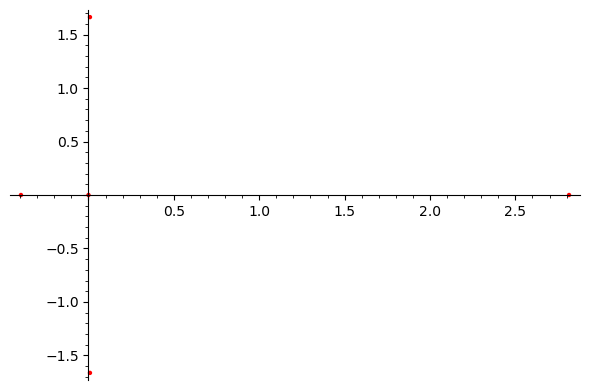

exponent:  1


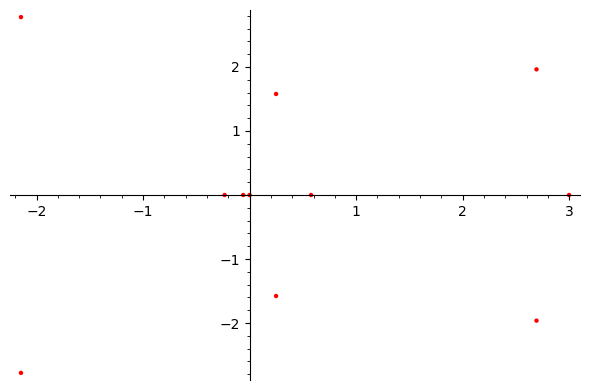

exponent:  2


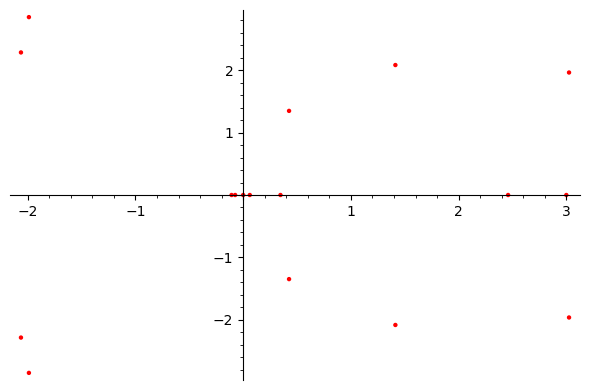

exponent:  3


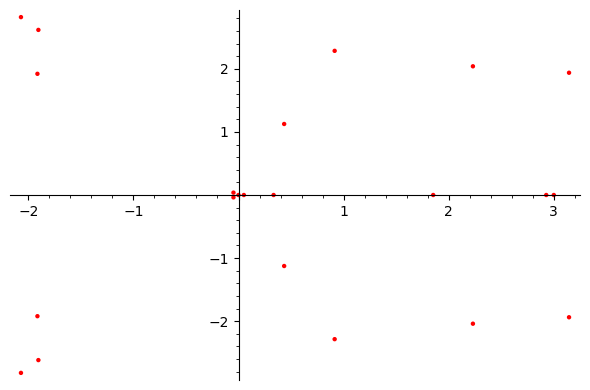

exponent:  4


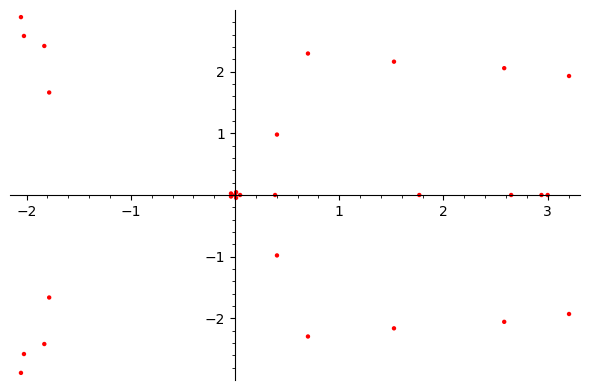

exponent:  5


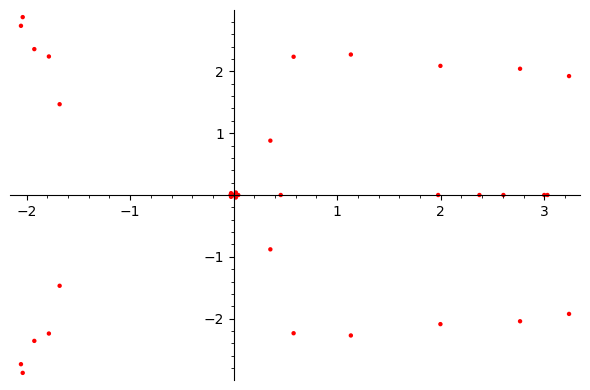

exponent:  6


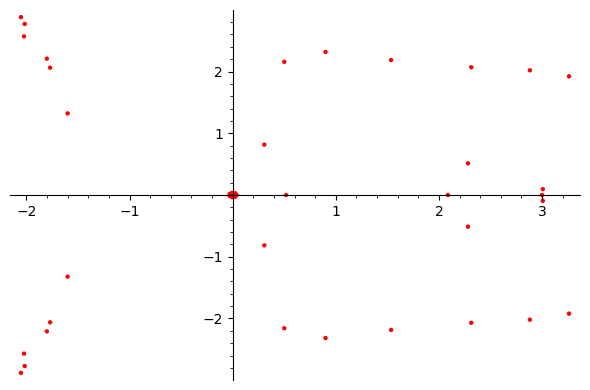

exponent:  7


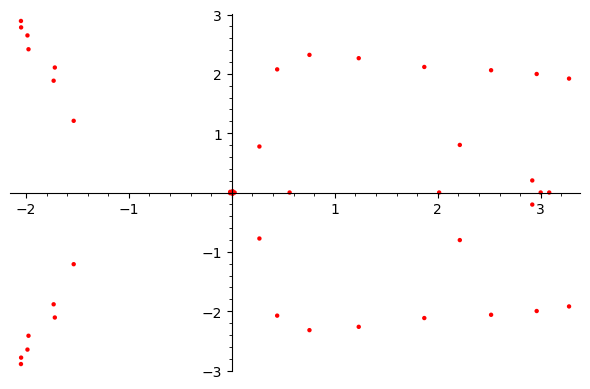

exponent:  8


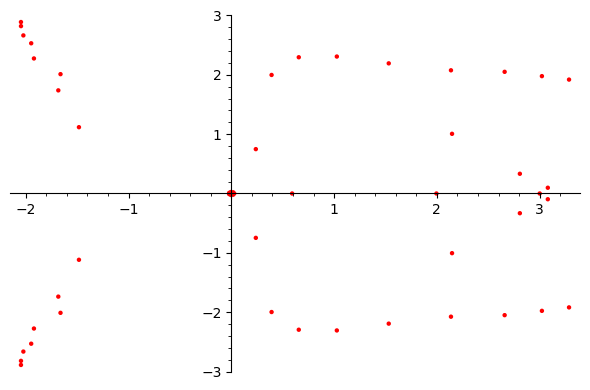

exponent:  9


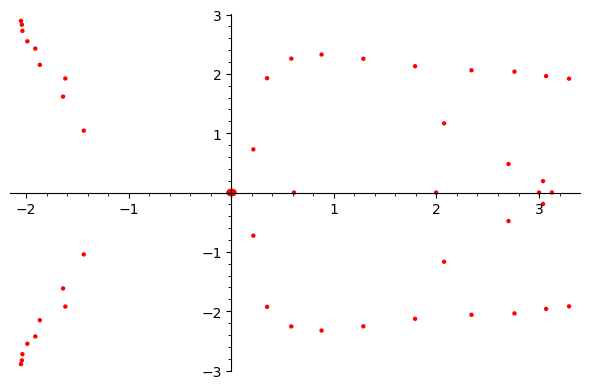

exponent:  10


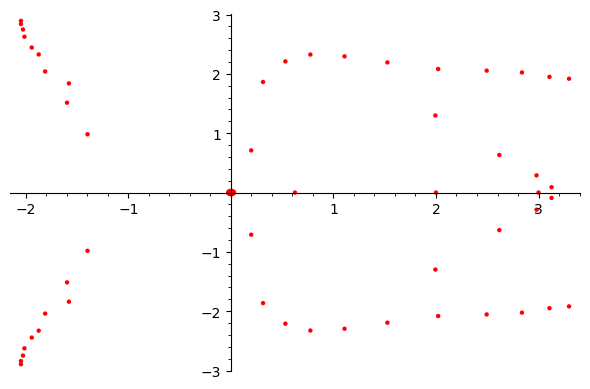

exponent:  11


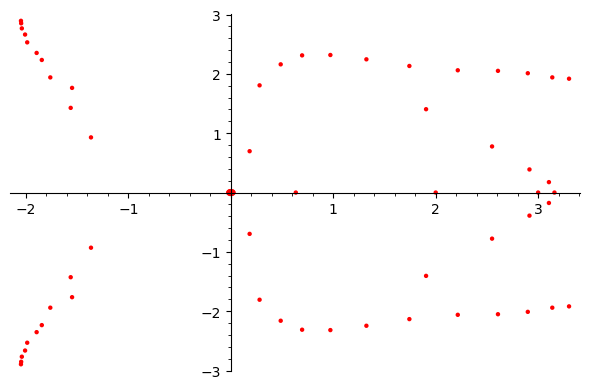

exponent:  12


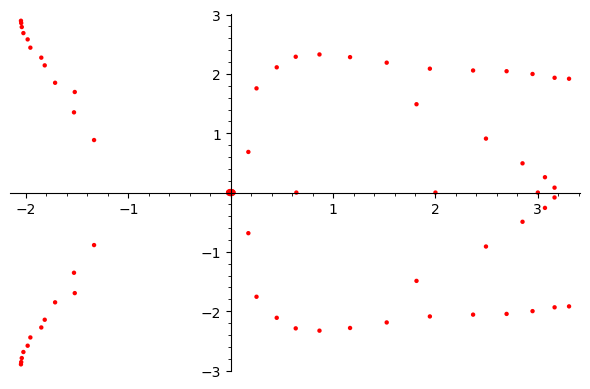

exponent:  13


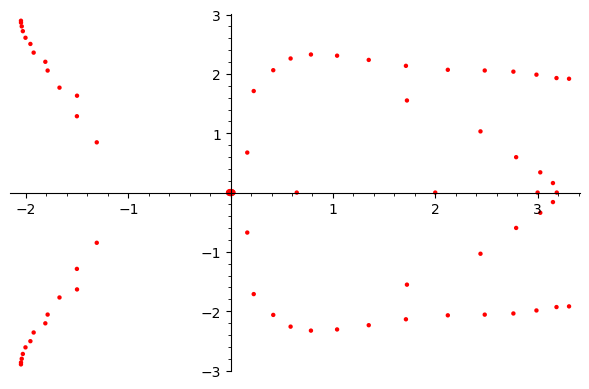

exponent:  14


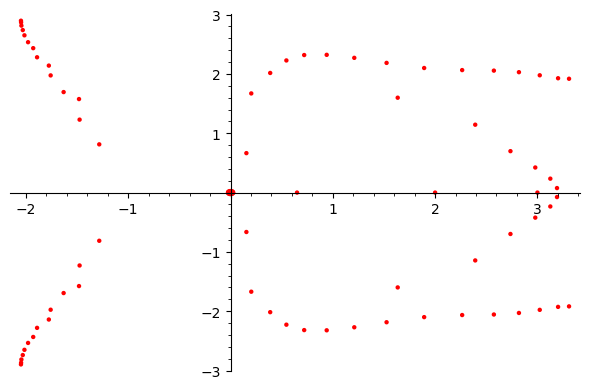

exponent:  15


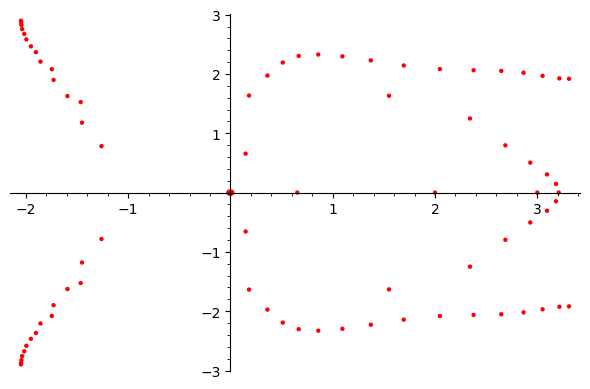

exponent:  16


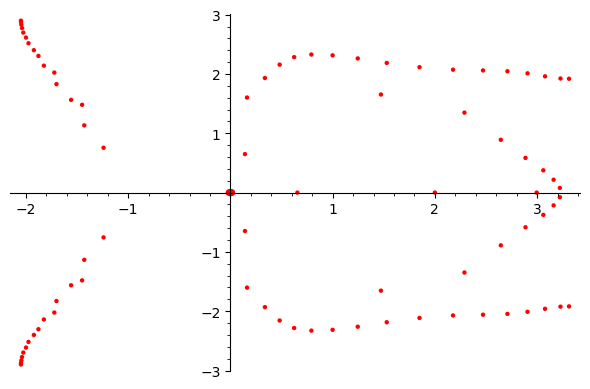

exponent:  17


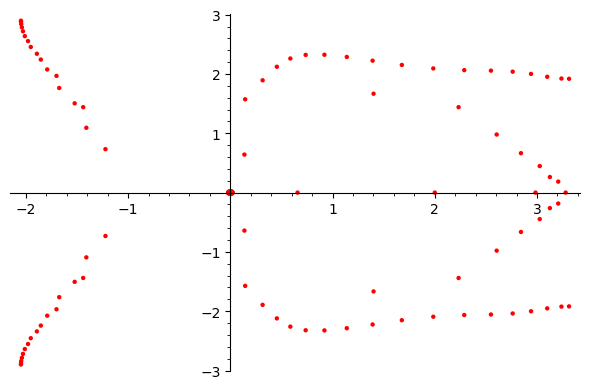

exponent:  18


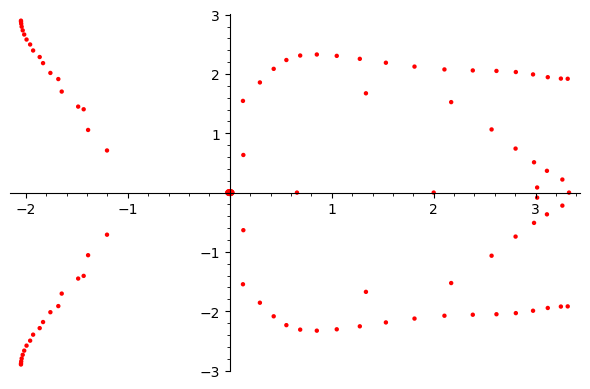

exponent:  19


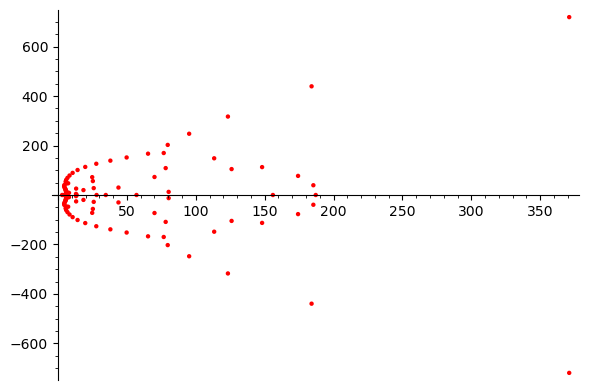

In [4]:
import pickle
rfile = open('/Users/barrybrent/10sept22no4.txt','rb') #dagger Euler exponents polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lnth=len(s)
for k in [0..lnth-1]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    poly=R(poly)
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        root=pr[j][0]
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='red',size=10)
    show(rootplot)

In [4]:
import pickle
rfile = open('/Users/barrybrent/10sept22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..1]:
    m=s[k][0]
    exlist=s[k][1]
    print("---------------------------------------------------------------")
    print("m: ",m)
    print()
    print(exlist)

---------------------------------------------------------------
m:  3

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
---------------------------------------------------------------
m:  4

[15200/27, 187807856/729, 7837307276192/59049, 38539883539831552/531441, 611011468571436134944/14348907, 30273793867433033121537680/1162261467, 171397808325717027058508044640/10460353203, 2971855535894973242291141970624512/282429536481, 471121197114465645362383444691548332032/68630377364883, 933571016696543856519539169928015472497744/205891132094649, 16817808712453775235396963240987183584139995872/5559060566555523, 9164670154887023063625363311820086017020842525

In [5]:
import pickle
rfile = open('/Users/barrybrent/10sept22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..1]:
    m=s[k][0]
    exlist=s[k][1]
    print("m: ",m," exlist length: ",len(exlist))

m:  3  exlist length:  98
m:  4  exlist length:  98


In [6]:
import pickle
rfile = open('/Users/barrybrent/10sept22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
ls=len(s)
data=[]
print("s length: ",ls)
for k in [0..ls-1]:
    exlist=s[k][1]
    data=data+[len(exlist)]
print(data)
        

s length:  118
[98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98]


In [8]:
# interpolating polynomials with more intuitive code.
import pickle
rfile = open('/Users/barrybrent/10sept22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/16sept22no1.txt','wb') #dagger Euler exponents polynomials
start = time.time()
for qpower in [1..21]:  #any more and the degrees become constant;
    #I display one repetition
    data=[]
    for k in [0..len(s)-1]:
        m=s[k][0]
        exponent=s[k][1][qpower-1]
        data=data+[[m,exponent]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    rl=D(rl)
    finish = time.time()
    print([qpower,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[1, 6, 0.010718107223510742]
[2, 12, 0.022162914276123047]
[3, 18, 0.03435707092285156]
[4, 24, 0.04622602462768555]
[5, 30, 0.05805492401123047]
[6, 36, 0.07004714012145996]
[7, 42, 0.08270406723022461]
[8, 48, 0.09578800201416016]
[9, 54, 0.1094980239868164]
[10, 60, 0.12465596199035645]
[11, 66, 0.1806328296661377]
[12, 72, 0.1967000961303711]
[13, 78, 0.21287202835083008]
[14, 84, 0.22978425025939941]
[15, 90, 0.24705791473388672]
[16, 96, 0.26619815826416016]
[17, 102, 0.28708887100219727]
[18, 108, 0.3080940246582031]
[19, 114, 0.3295860290527344]
[20, 117, 0.35373497009277344]
[21, 117, 0.3774740695953369]


In [9]:
# *correct* interpolating polynomials with intuitive code.
import pickle
rfile = open('/Users/barrybrent/10sept22no3.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/16sept22no2.txt','wb') #dagger Euler exponents polynomials
start = time.time()
for qpower in [1..20]:  #any more and the degrees become constant;
    data=[]
    for k in [0..len(s)-1]:
        m=s[k][0]
        exponent=s[k][1][qpower-1]
        data=data+[[m,exponent]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    rl=D(rl)
    finish = time.time()
    print([qpower,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[1, 6, 0.010638952255249023]
[2, 12, 0.021898984909057617]
[3, 18, 0.07218098640441895]
[4, 24, 0.08402681350708008]
[5, 30, 0.09561491012573242]
[6, 36, 0.1078188419342041]
[7, 42, 0.12381887435913086]
[8, 48, 0.1378648281097412]
[9, 54, 0.15372991561889648]
[10, 60, 0.16876578330993652]
[11, 66, 0.18436098098754883]
[12, 72, 0.20027899742126465]
[13, 78, 0.2172708511352539]
[14, 84, 0.2340538501739502]
[15, 90, 0.25139498710632324]
[16, 96, 0.3126859664916992]
[17, 102, 0.33274173736572266]
[18, 108, 0.3552689552307129]
[19, 114, 0.3767368793487549]
[20, 117, 0.40062594413757324]


exponent:  1


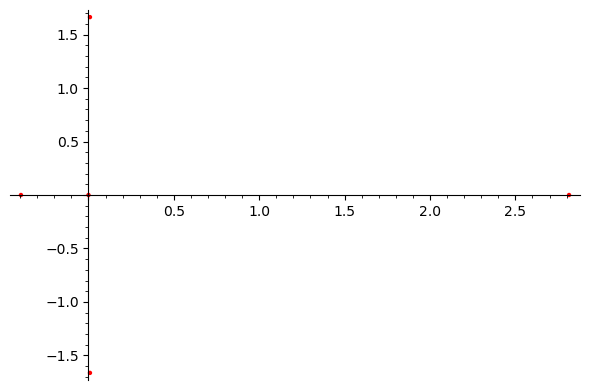

exponent:  2


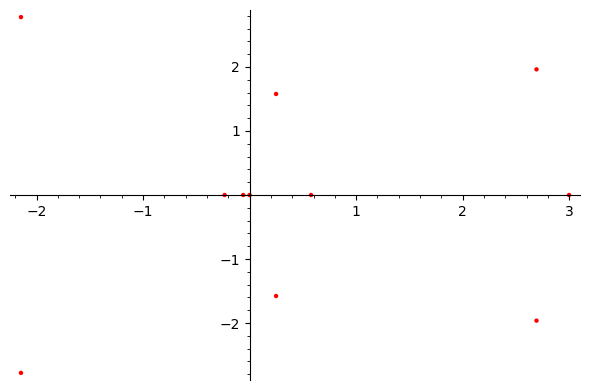

exponent:  3


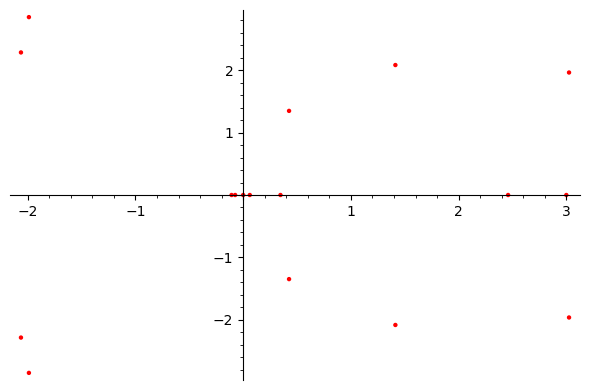

exponent:  4


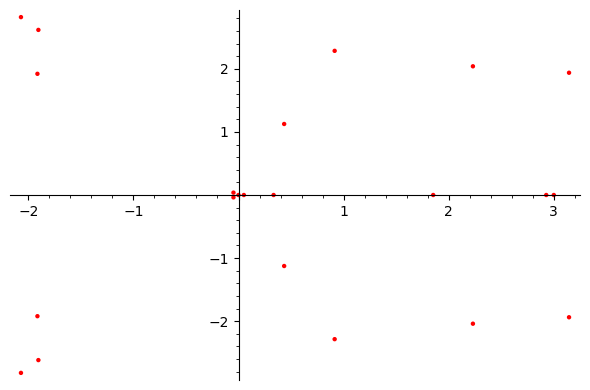

exponent:  5


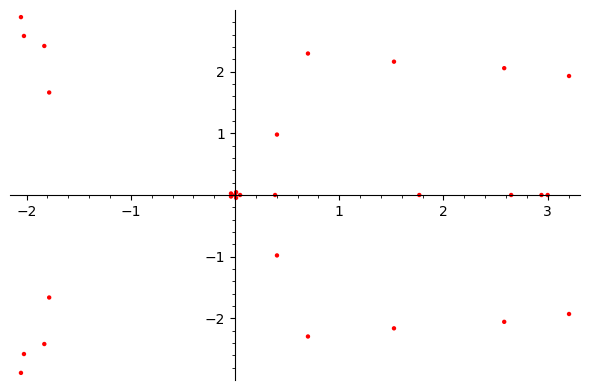

exponent:  6


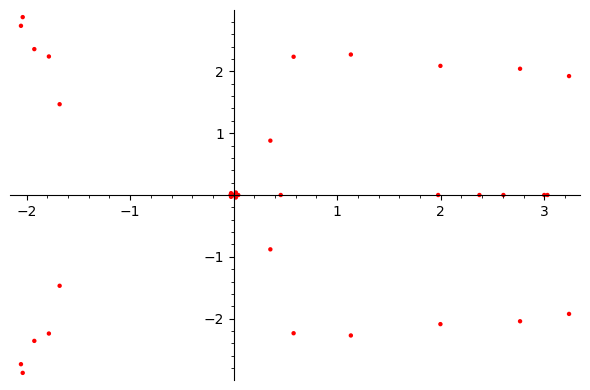

exponent:  7


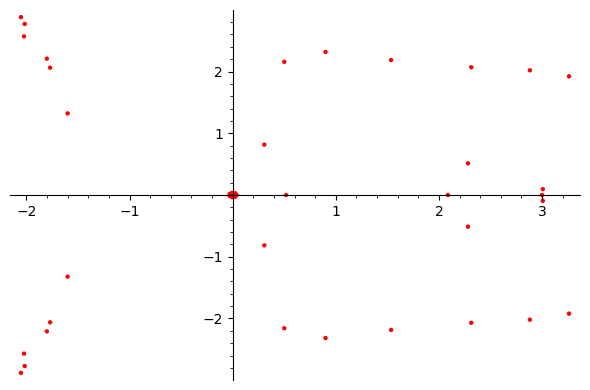

exponent:  8


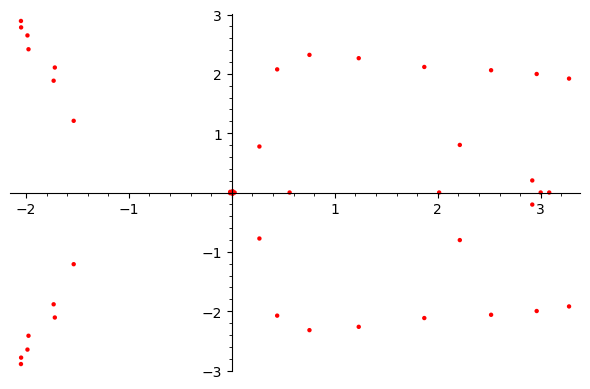

exponent:  9


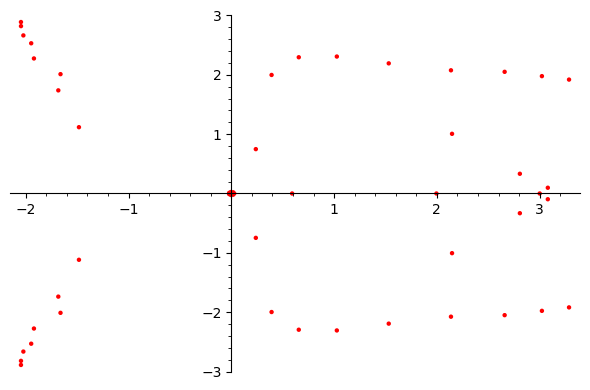

exponent:  10


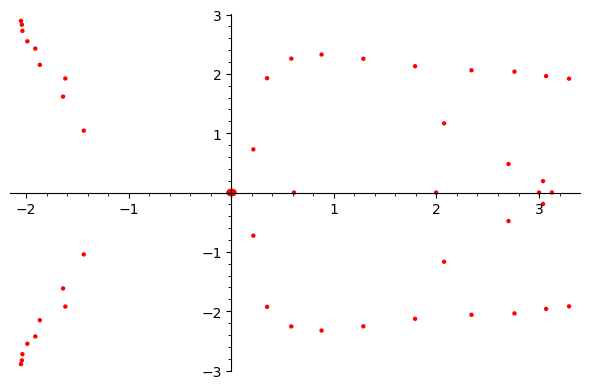

exponent:  11


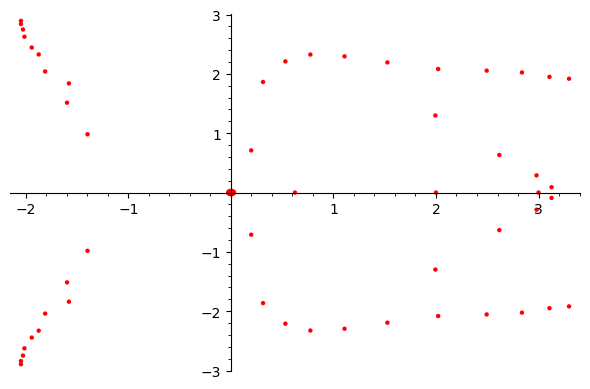

exponent:  12


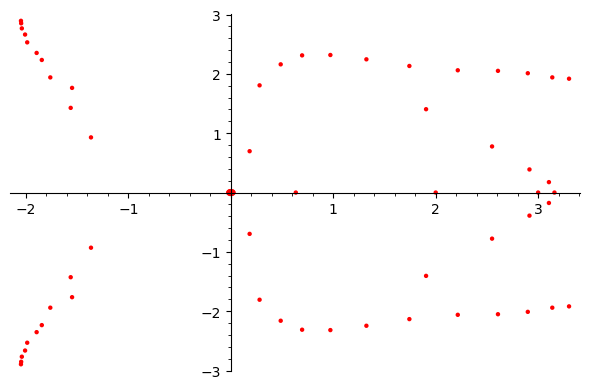

exponent:  13


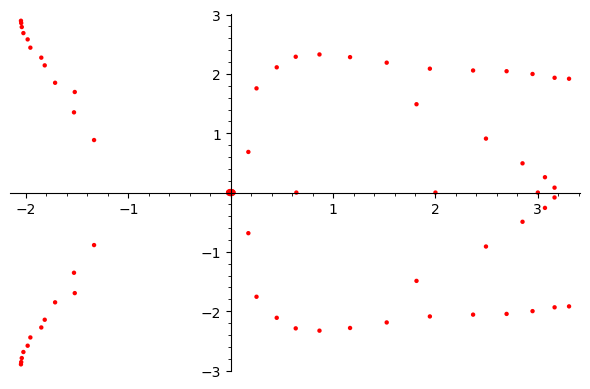

exponent:  14


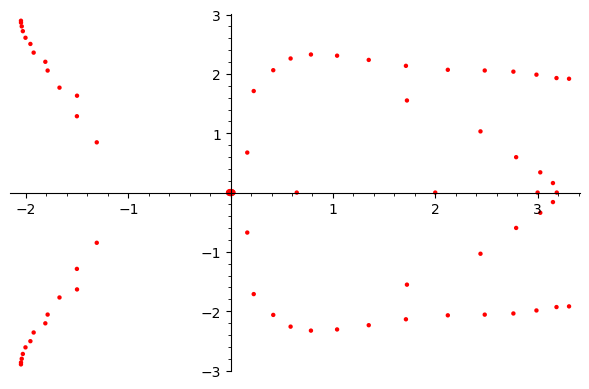

exponent:  15


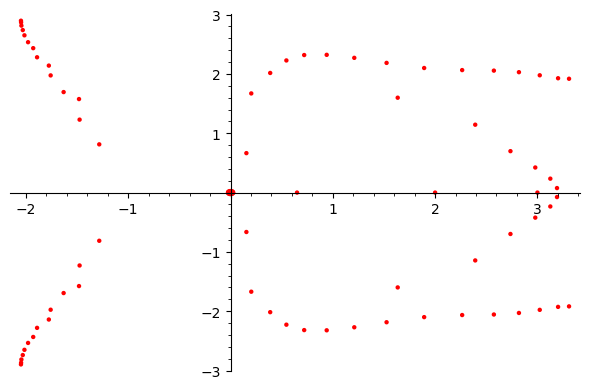

exponent:  16


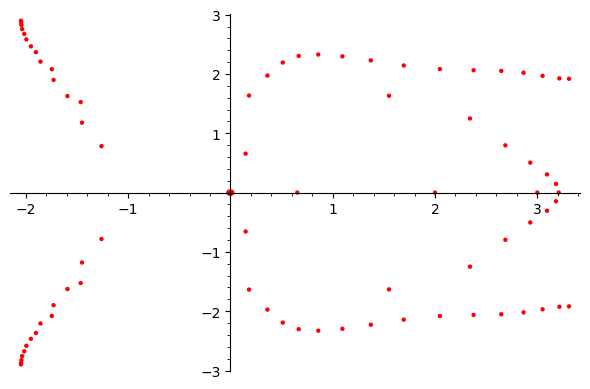

exponent:  17


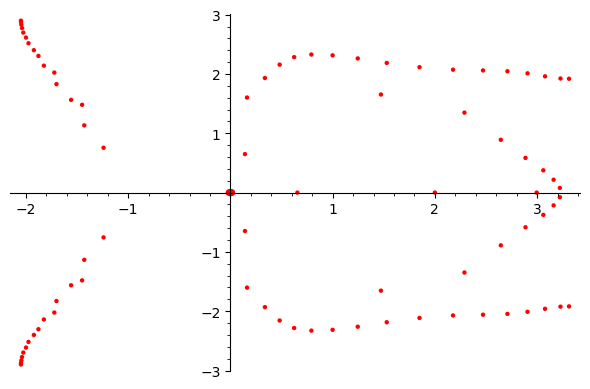

exponent:  18


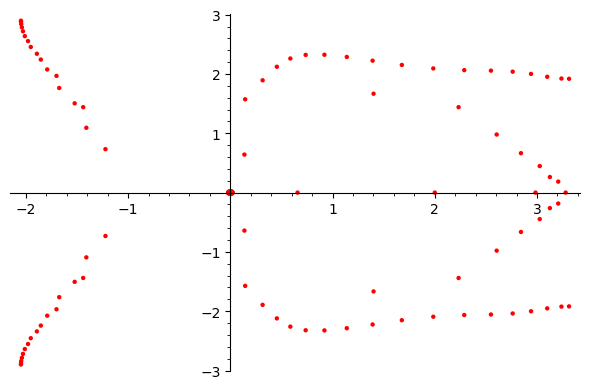

exponent:  19


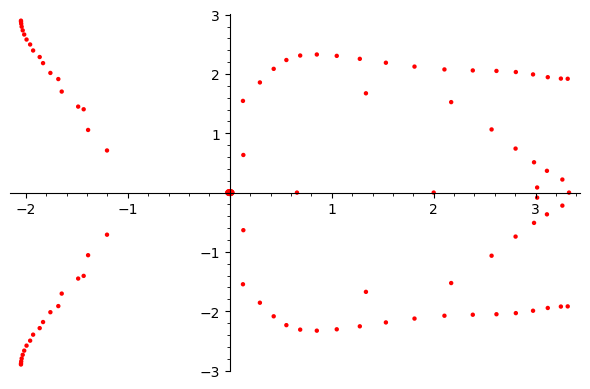

exponent:  20


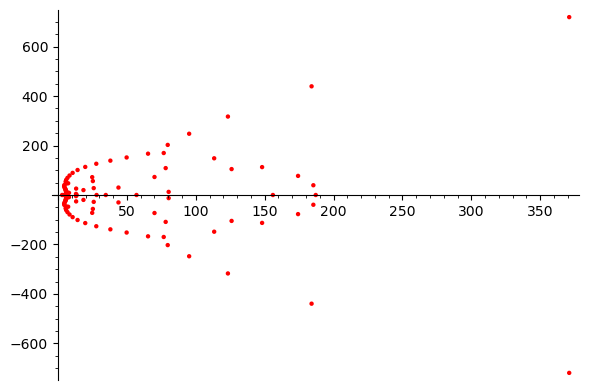

In [10]:
import pickle
rfile = open('/Users/barrybrent/16sept22no2.txt','rb') #dagger Euler exponents polynomials
#with intuitive code
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lnth=len(s)
for k in [0..lnth-1]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    poly=R(poly)
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        root=pr[j][0]
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='red',size=10)
    show(rootplot)

In [12]:
#direct comparison of the polynomials using both routines.
import pickle
rfile1 = open('/Users/barrybrent/16sept22no2.txt','rb') #dagger Euler exponents polynomials
#with intuitive code
rs1=pickle.load(rfile1)
rfile1.close()
s1=stripQuotationMarks(rs1)
lnth1=len(s1)

rfile2 = open('/Users/barrybrent/10sept22no4.txt','rb') #dagger Euler exponents polynomials
#with strange code
rs2=pickle.load(rfile2)
rfile2.close()
s2=stripQuotationMarks(rs2)
lnth2=len(s2)

print(len(s1),len(s2))

20 20


In [13]:
#direct comparison of the polynomials using both routines.
import pickle
rfile = open('/Users/barrybrent/16sept22no2.txt','rb') #dagger Euler exponents polynomials
#with intuitive code
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)

rfile2 = open('/Users/barrybrent/10sept22no4.txt','rb') #dagger Euler exponents polynomials
#with strange code
rs2=pickle.load(rfile2)
rfile2.close()
s2=stripQuotationMarks(rs2)

for k in [0..1]:
    print("=====================================================================================")
    print("k: ",k)
    print()
    poly1=s1[k][1]
    poly2=s2[k][1]
    print(poly1)
    print()
    print(poly2)
    


k:  0

13/36*x^6 - 95/108*x^5 + 11/18*x^4 - 65/27*x^3 - 10/9*x^2

13/36*x^6 - 95/108*x^5 + 11/18*x^4 - 65/27*x^3 - 10/9*x^2
k:  1

169/2592*x^12 - 1235/3888*x^11 + 14173/23328*x^10 - 4247/1944*x^9 + 83603/5832*x^8 - 9694/243*x^7 + 312367/5832*x^6 - 16337/216*x^5 + 12143/972*x^4 + 1667/162*x^3 + 5/9*x^2

169/2592*x^12 - 1235/3888*x^11 + 14173/23328*x^10 - 4247/1944*x^9 + 83603/5832*x^8 - 9694/243*x^7 + 312367/5832*x^6 - 16337/216*x^5 + 12143/972*x^4 + 1667/162*x^3 + 5/9*x^2


In [15]:
#direct comparison of the polynomials using both routines.
import pickle
rfile = open('/Users/barrybrent/16sept22no2.txt','rb') #dagger Euler exponents polynomials
#with intuitive code
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)

rfile2 = open('/Users/barrybrent/10sept22no4.txt','rb') #dagger Euler exponents polynomials
#with strange code
rs2=pickle.load(rfile2)
rfile2.close()
s2=stripQuotationMarks(rs2)

no=0
for k in [0..19]:
    poly1=s1[k][1]
    poly2=s2[k][1]
    if poly1!=poly2:no=no+1
print(no)

0
